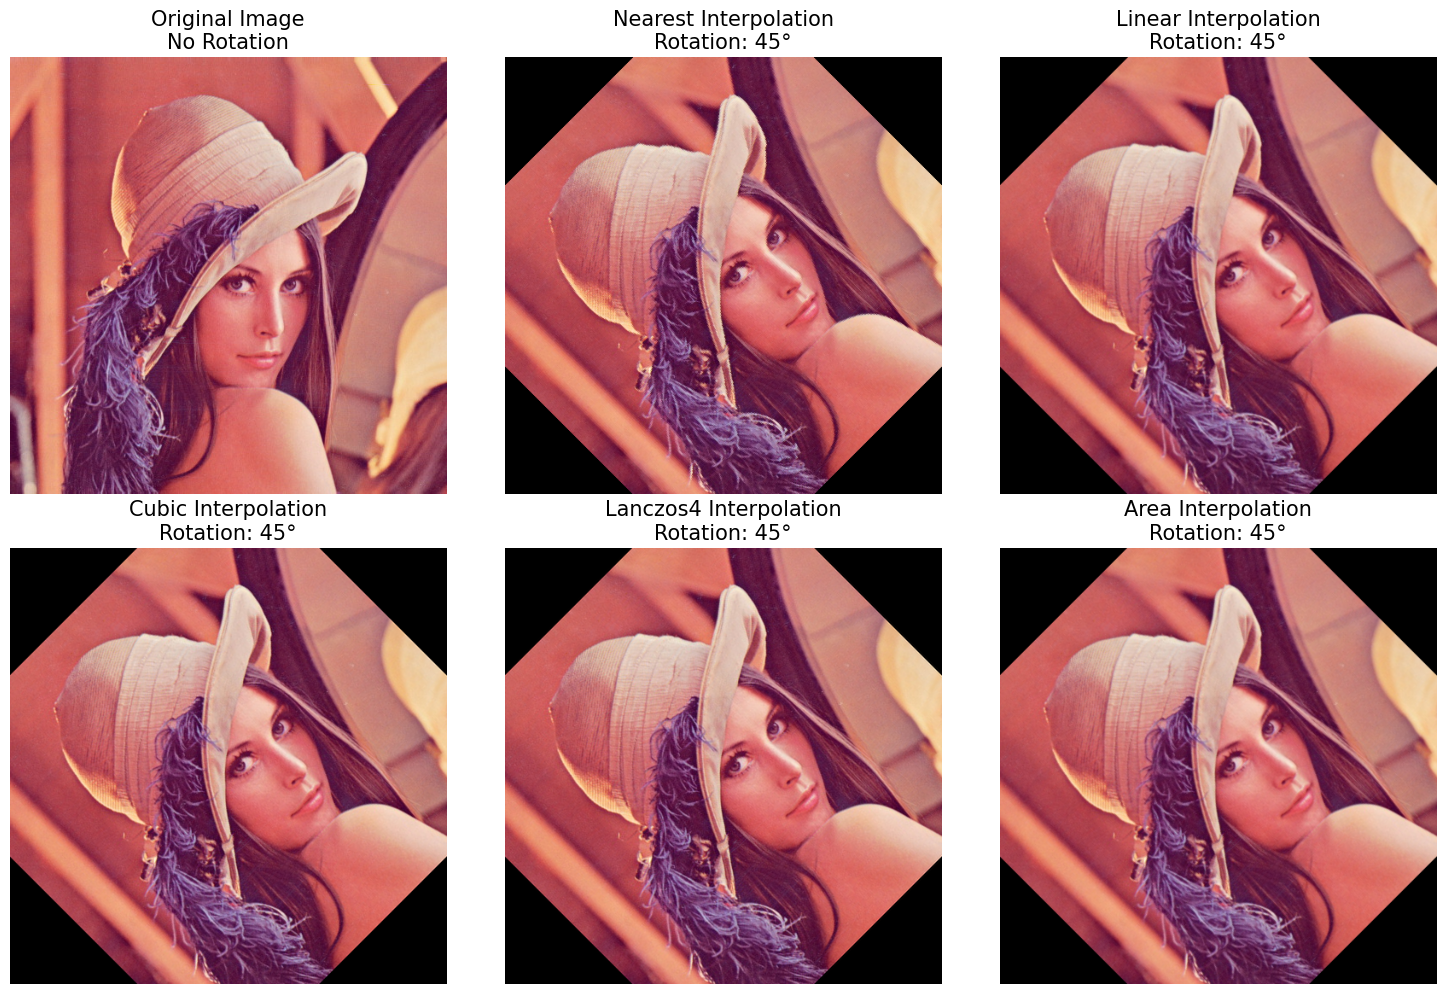

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# lena.jpg 이미지를 로드하고 RGB로 변환
image = cv2.imread('lena.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 회전 각도 정의
angle = 45  # 회전 각도 (45도)

# 원본 이미지 크기
(h, w) = image_rgb.shape[:2]

# 회전 중심 (이미지 중심)
center = (w // 2, h // 2)

# 보간법별 회전 적용
interpolations = {
    "Nearest": cv2.INTER_NEAREST,
    "Linear": cv2.INTER_LINEAR,
    "Cubic": cv2.INTER_CUBIC,
    "Lanczos4": cv2.INTER_LANCZOS4,
    "Area": cv2.INTER_AREA,
}

rotated_images = {}
for name, method in interpolations.items():
    # 회전 변환 행렬 계산
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # 회전 적용
    rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (w, h), flags=method)
    rotated_images[name] = rotated_image

# 이미지 출력
plt.figure(figsize=(15, 10))
fs = 15  # 폰트 사이즈

# 원본 이미지
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title(f"Original Image\nNo Rotation", fontsize=fs)
plt.axis("off")

# 회전된 이미지들
for i, (name, rotated_image) in enumerate(rotated_images.items(), 2):
    plt.subplot(2, 3, i)
    plt.imshow(rotated_image)
    plt.title(f"{name} Interpolation\nRotation: {angle}°", fontsize=fs)
    plt.axis("off")

plt.tight_layout()
plt.show()